In [102]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# First Sperate a portion of data for testing

In [103]:
# Before running please make a folder named 'train' and in the 'train' folder create another six folder for six classes of defects
# These six folder should have 300 images each.
try:
    train_folder = "NEU/train"
    os.mkdir("NEU/test")
    test_folder = "NEU/test"
    files = os.listdir(train_folder)
    import shutil
    import numpy as np
    for f in files:
        os.mkdir(test_folder + '/'+ f)

        # 60% of the data will stay back in 'train' folder
        # 40% of the data will be moved to 'test' folder
        spilt_num=int(len(os.listdir(train_folder + '/'+ f))*0.6)

        for i in os.listdir(train_folder + '/'+ f)[spilt_num:]:
            shutil.move(train_folder + '/'+ f +'/'+ i, test_folder + '/'+ f +'/'+ i)
except:
    print("\nEverything already have in the directory. You don't need to run this cell")


Everything already have in the directory. You don't need to run this cell


## Now divide the test data into test and validation data

In [104]:
try:
    test_folder = "NEU/test"
    os.mkdir("NEU/valid")
    valid_folder = "NEU/valid"
    files = os.listdir(test_folder)
    import shutil
    import numpy as np
    for f in files:
        os.mkdir(valid_folder + '/'+ f)

        # The 40% is again split in half 20-20
        spilt_num=int(len(os.listdir(test_folder + '/'+ f))*0.5)
        
        for i in os.listdir(test_folder + '/'+ f)[spilt_num:]:
            shutil.move(test_folder + '/'+ f +'/'+ i, valid_folder + '/'+ f +'/'+ i)
except:
    print("\nEverything already have in the directory. You don't need to run this cell")


Everything already have in the directory. You don't need to run this cell


# Loading the images into image generator and also applying filters

- Rescaling
- Shear
- Zoom
- Horizontal Flip

In [105]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'NEU/train',
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        'NEU/valid',
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 1080 images belonging to 6 classes.
Found 360 images belonging to 6 classes.


In [106]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.978 ):
            print("\nReached 97.8% accuracy so cancelling training!")
            self.model.stop_training = True 

### Defining CNN model

In [107]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 49, 49, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 24, 24, 128)      

#### Evalutaion metrics

In [108]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


#### Training and validating the images

In [109]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=8,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/8


108/108 [==============================] - 60s 551ms/step - loss: 1.8797 - accuracy: 0.2500 - val_loss: 1.4028 - val_accuracy: 0.4722
Epoch 2/8
108/108 [==============================] - 61s 560ms/step - loss: 1.3742 - accuracy: 0.4694 - val_loss: 1.0366 - val_accuracy: 0.6111
Epoch 3/8
108/108 [==============================] - 59s 544ms/step - loss: 1.0706 - accuracy: 0.5778 - val_loss: 0.9600 - val_accuracy: 0.6111
Epoch 4/8
108/108 [==============================] - 59s 547ms/step - loss: 0.8909 - accuracy: 0.6796 - val_loss: 0.5815 - val_accuracy: 0.8028
Epoch 5/8
108/108 [==============================] - 59s 547ms/step - loss: 0.6944 - accuracy: 0.7694 - val_loss: 0.3595 - val_accuracy: 0.8722
Epoch 6/8
108/108 [==============================] - 59s 543ms/step - loss: 0.6223 - accuracy: 0.7907 - val_loss: 0.4147 - val_accuracy: 0.8250
Epoch 7/8
108/108 [==============================] - 59s 548ms/step - loss: 0.5812 - accuracy: 0.8009 - val_loss: 1.2819 - val_accuracy: 0.5861
Ep

#### Plotting the result

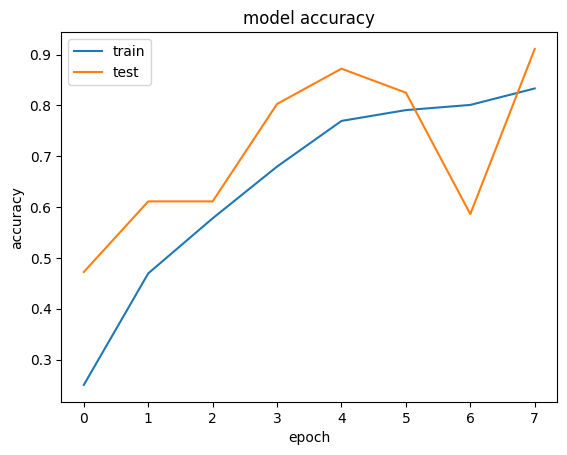

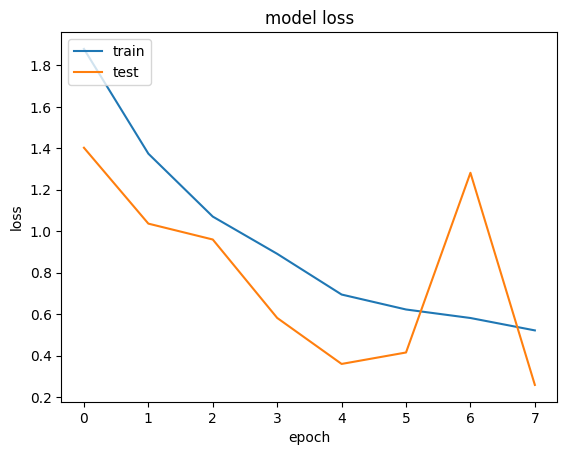

In [110]:
import matplotlib.pyplot as plt 
plt.figure(1)  
# summarize history for accuracy  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss

plt.figure(2)
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()


# Storing Trained Model

In [111]:
import pickle

# Save model
model_pkl_file = "defect_detection_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

# Loading the test folder for testing the model

In [112]:
# First, we are going to load the file names and their respective target labels into numpy array! 
from sklearn.datasets import load_files
from sklearn.metrics import precision_score
import numpy as np

test_dir = 'NEU/test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_dir)

In [113]:
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [114]:
from keras import utils
y_test = utils.to_categorical(y_test, no_of_classes)


In [115]:
# We just have the file names in the x set. Let's load the images and convert them into array.
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (360, 200, 200, 3)


In [116]:
x_test = x_test.astype('float32')/255

#### Testing the model against the test data and plotting the result

12/12 [==============================] - 2s 178ms/step
Precision = 92.10


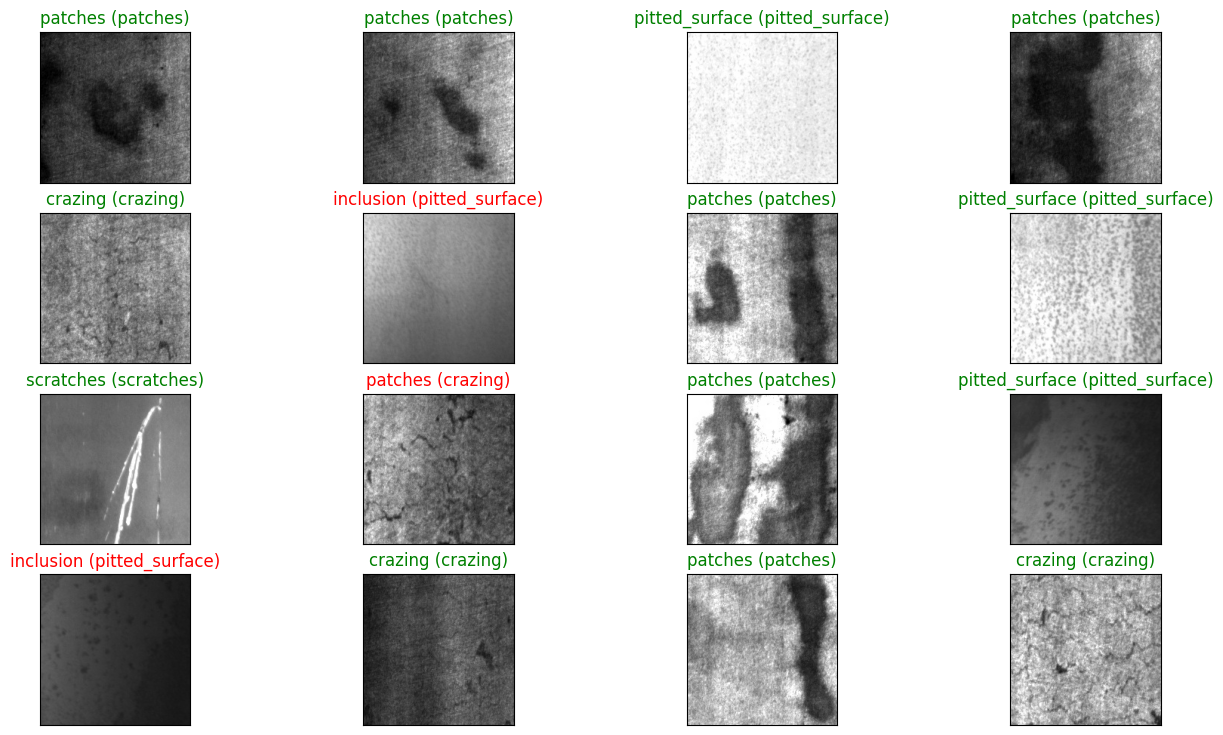

In [121]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

true_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(y_pred, axis=1)
precision = precision_score(true_labels, predicted_labels, average='weighted')
print("Precision = %.2f" %(precision * 100))

number_of_images = 16
rows = columns = 4

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=number_of_images, replace=False)):
    ax = fig.add_subplot(rows, columns, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
                 